In [1]:
import pandas as pd
import tensorflow as tf
physcial_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physcial_devices[0],True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential


In [2]:
# from google.colab import files 
# uploaded = files.upload()

In [3]:
train = pd.read_csv('sign_mnist_train.csv.zip')
test = pd.read_csv('sign_mnist_test.csv.zip')

In [4]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

Text(0.5, 1.0, 'Label')

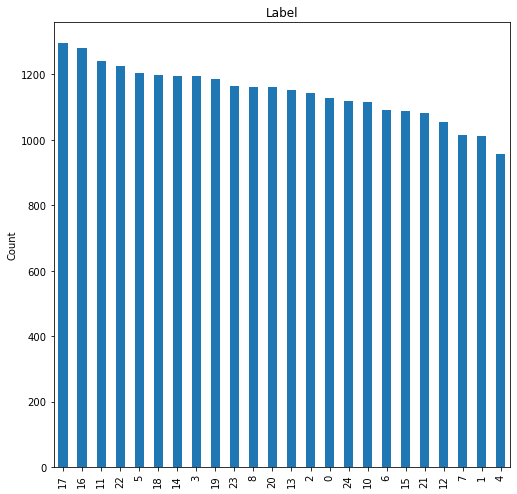

In [5]:
#checking balanced dataset

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train.label.value_counts().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [6]:
train_data =np.array(train,dtype='float32')
test_data =np.array(test,dtype='float32')

# X_train = train_data[:,1:]/255
# X_test = test_data[:,1:]/255

X_train = train_data[:,1:]
X_test = test_data[:,1:]

y_train = np.array(pd.get_dummies(train.label))
y_test = np.array(pd.get_dummies(test.label))




In [7]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))


In [8]:
model = Sequential([
                    Rescaling(1/255, input_shape=X_train.shape[1:]),
                    Conv2D(32,3,activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.5),
                    Conv2D(64,3,activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.5),
                    Conv2D(128,3,activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.5),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(24,activation='softmax')




])

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
history = model.fit(X_train,y_train,batch_size=64,epochs=100,validation_split=0.1,callbacks=[EarlyStopping()])

Epoch 1/100
387/387 [==============================] - 5s 7ms/step - loss: 3.0546 - accuracy: 0.0804 - val_loss: 1.3457 - val_accuracy: 0.6063
Epoch 2/100
387/387 [==============================] - 2s 6ms/step - loss: 1.4541 - accuracy: 0.5002 - val_loss: 0.6641 - val_accuracy: 0.8194
Epoch 3/100
387/387 [==============================] - 2s 6ms/step - loss: 0.9738 - accuracy: 0.6595 - val_loss: 0.3896 - val_accuracy: 0.9020
Epoch 4/100
387/387 [==============================] - 2s 6ms/step - loss: 0.7389 - accuracy: 0.7398 - val_loss: 0.2752 - val_accuracy: 0.9385
Epoch 5/100
387/387 [==============================] - 2s 6ms/step - loss: 0.6158 - accuracy: 0.7827 - val_loss: 0.2041 - val_accuracy: 0.9581
Epoch 6/100
387/387 [==============================] - 2s 6ms/step - loss: 0.5158 - accuracy: 0.8192 - val_loss: 0.1640 - val_accuracy: 0.9712
Epoch 7/100
387/387 [==============================] - 2s 6ms/step - loss: 0.4747 - accuracy: 0.8322 - val_loss: 0.1187 - val_accuracy: 0.9822

In [11]:
_,acc =model.evaluate(X_test,y_test)
print(f'Model accuracy: {acc}')

225/225 [==============================] - 1s 4ms/step - loss: 0.1461 - accuracy: 0.9612
Model accuracy: 0.9612381458282471


In [12]:
y_pred = model.predict(X_test)
y_pred.shape

(7172, 24)

In [13]:
y_pred2 = np.argmax(y_pred, axis=1)
y_pred2.shape

(7172,)

In [14]:
y_test2 = np.argmax(y_test,axis=1)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       331
           1       1.00      0.99      1.00       432
           2       0.94      1.00      0.97       310
           3       0.95      1.00      0.97       245
           4       0.94      1.00      0.97       498
           5       1.00      1.00      1.00       247
           6       0.92      0.98      0.95       348
           7       0.99      0.95      0.97       436
           8       0.97      0.98      0.97       288
           9       0.99      0.98      0.98       331
          10       0.95      1.00      0.97       209
          11       0.94      0.97      0.95       394
          12       1.00      0.85      0.92       291
          13       1.00      0.92      0.96       246
          14       1.00      0.99      0.99       347
          15       0.99      1.00      1.00       164
          16       0.73      1.00      0.84       144
          17       0.96    

In [16]:
model.save('Sign_language_CNN_model')

INFO:tensorflow:Assets written to: Sign_language_CNN_model/assets
